## Usando el Modelo Logistic Regression 

El conjunto de datos tiene tres sentimientos: 
  * negativo (-1), 
  * neutral (0) y 
  * positivo (+1). 

Contiene dos campos, para el tweet y la etiqueta.

# **Cargar las librerías estándar**

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# **Carga de librerías especiales**

In [ ]:
import tweepy 
tweepy

<module 'tweepy' from '/usr/local/lib/python3.8/dist-packages/tweepy/__init__.py'>

In [ ]:
from textblob import TextBlob 
TextBlob

textblob.blob.TextBlob

In [ ]:
from wordcloud import WordCloud
WordCloud

wordcloud.wordcloud.WordCloud

In [ ]:
import re
re

<module 're' from '/usr/lib/python3.8/re.py'>

# **Cargar Data**

In [ ]:
%%time
df = pd.read_csv('https://raw.githubusercontent.com/labrdev/csvs/sem13/tweets_data.csv') 
df.head()

CPU times: user 271 ms, sys: 43.3 ms, total: 315 ms
Wall time: 760 ms


,clean_tweet,category
0,spss exact test 製品機能紹介,1
1,spy qqq ndx dia iwm nflx fb intc smh aapl nvda...,1
2,cve ibm note susceptible stack based buffer ov...,-1
3,cve ibm note susceptible stack based buffer ov...,-1
4,cve ibm note susceptible stack based buffer ov...,-1


In [ ]:
df.category.unique()

array([ 1, -1,  0])

In [ ]:
df.isnull().sum()

clean_tweet    816
category         0
dtype: int64

In [ ]:
df.drop(df[df['clean_tweet'].isna()].index, inplace=True)
df.drop(df[df['category'].isna()].index, inplace=True)

In [ ]:
df.isnull().sum()

clean_tweet    0
category       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99184 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   clean_tweet  99184 non-null  object
 1   category     99184 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.3+ MB


# **Carga de Librerías Adicionales**

In [ ]:
import seaborn as sns

In [ ]:
import nltk
nltk

<module 'nltk' from '/usr/local/lib/python3.8/dist-packages/nltk/__init__.py'>

El kit de herramientas de lenguaje natural, o más comúnmente NLTK, es un conjunto de bibliotecas y programas para el procesamiento del lenguaje natural simbólico y estadísticos para el lenguaje de programación Python.

# **SKLEARN**

## **TRANSFORMACIONES DE DATOS**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer

sklearn.feature_extraction.text.CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVectorizer

sklearn.feature_extraction.text.TfidfVectorizer

## **PRE-PROCESAMIENTO**

In [ ]:
from sklearn.model_selection import train_test_split
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [ ]:
from sklearn.model_selection import StratifiedKFold
StratifiedKFold

sklearn.model_selection._split.StratifiedKFold

## ***MODELOS***

In [ ]:
from sklearn.linear_model import LogisticRegression
LogisticRegression

sklearn.linear_model._logistic.LogisticRegression

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
OneVsRestClassifier

sklearn.multiclass.OneVsRestClassifier

## **METRICAS DE EVALUACION DE MODELOS**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix
accuracy_score, f1_score, classification_report,confusion_matrix

(<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>,
 <function sklearn.metrics._classification.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>,
 <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>,
 <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>)

## **LIBRERIAS DE PARA SENTIMENT ANALYSIS (NLP)**

In [ ]:
from keras.preprocessing.text import Tokenizer
Tokenizer

keras.preprocessing.text.Tokenizer

In [ ]:
from keras.utils import pad_sequences
pad_sequences

<function keras.utils.data_utils.pad_sequences(sequences, maxlen=None, dtype='int32', padding='pre', truncating='pre', value=0.0)>

In [ ]:
import tensorflow as tf
tf

<module 'tensorflow' from '/usr/local/lib/python3.8/dist-packages/tensorflow/__init__.py'>

# **PROCESAMIENTO**

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
text = ''
print(len(text))

0


In [ ]:
df['category']

0        1
1        1
2       -1
3       -1
4       -1
        ..
99995   -1
99996    1
99997    0
99998    0
99999    0
Name: category, Length: 99184, dtype: int64

In [ ]:
df['clean_tweet']

0                                   spss exact test 製品機能紹介
1        spy qqq ndx dia iwm nflx fb intc smh aapl nvda...
2        cve ibm note susceptible stack based buffer ov...
3        cve ibm note susceptible stack based buffer ov...
4        cve ibm note susceptible stack based buffer ov...
                               ...                        
99995    arthur jensen rebuking finch itt ampt dupont u...
99996    nice print ibm size price amount time see join...
99997    join tsla nvda mu amzn msft baba nflx adbe axp...
99998    ibm introduce remotesensing ai saudi arabia ar...
99999    ibm hourly chart suggests trend level suggests...
Name: clean_tweet, Length: 99184, dtype: object

In [ ]:
df[df['category'] == 1.0]

,clean_tweet,category
0,spss exact test 製品機能紹介,1
1,spy qqq ndx dia iwm nflx fb intc smh aapl nvda...,1
7,mckernan old ibm slide go around machine never...,1
8,ibm made computer nazi keep track jewish captive,1
9,spy qqq ndx dia iwm nflx fb intc smh aapl nvda...,1
...,...,...
99991,oh yeah amazing system cool machine way one th...,1
99992,feel could bring back somehow apple would new ibm,1
99993,yeah thanks ibm data analytics professional ce...,1
99994,spy qqq ndx dia iwm nflx fb intc smh aapl nvda...,1


In [ ]:
df[df['category'] == 1.0]['clean_tweet']

0                                   spss exact test 製品機能紹介
1        spy qqq ndx dia iwm nflx fb intc smh aapl nvda...
7        mckernan old ibm slide go around machine never...
8         ibm made computer nazi keep track jewish captive
9        spy qqq ndx dia iwm nflx fb intc smh aapl nvda...
                               ...                        
99991    oh yeah amazing system cool machine way one th...
99992    feel could bring back somehow apple would new ibm
99993    yeah thanks ibm data analytics professional ce...
99994    spy qqq ndx dia iwm nflx fb intc smh aapl nvda...
99996    nice print ibm size price amount time see join...
Name: clean_tweet, Length: 42801, dtype: object

In [ ]:
for tweet in df[df['category'] == 1.0]['clean_tweet']:
    text += f" {tweet}"

In [ ]:
text

Output hidden; open in https://colab.research.google.com to view.

# **EDA: World Cloud - Nube de Texto**

In [ ]:
#hacemos una nube de palabras para ver las palabras mas comunes
from wordcloud import WordCloud
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(text)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
wordcloud = WordCloud(
    width=500, 
    height=300, 
    background_color='black',
    contour_width=3,
    contour_color='steelblue',
    max_words=5000,
    stopwords = set(nltk.corpus.stopwords.words("english"))
    )

In [ ]:
wordcloud

In [ ]:
wordcloud.generate(text)

<function matplotlib.pyplot.show(*args, **kw)>

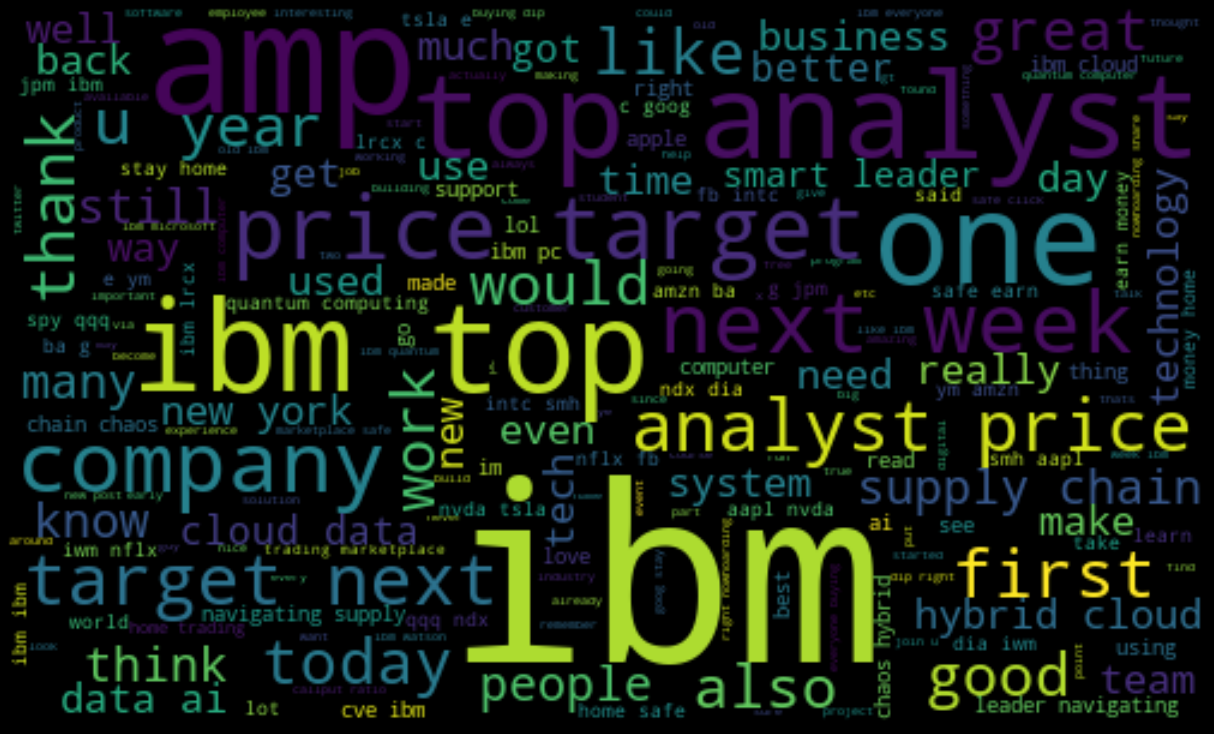

In [ ]:
fig = plt.figure(figsize=(20,10), facecolor='k',edgecolor='k')

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

# **SEGUNDO ANALISIS**

In [ ]:
CountVectorizer

sklearn.feature_extraction.text.CountVectorizer

In [ ]:
vec = CountVectorizer(max_features=10000)
vec

CountVectorizer(max_features=10000)

In [ ]:
vec.fit(df['clean_tweet'])

CountVectorizer(max_features=10000)

# PARTICION EN TRAIN Y TEST

In [ ]:
trn, val = train_test_split(df, test_size=0.20, random_state=111) 
# dividimos los datos en train y test


In [ ]:
trn

,clean_tweet,category
35856,global blockchain identity software market bus...,1
75383,ibm leader explains downstream impact quantum ...,1
85136,top corporation white supremacist many leading...,1
42908,ibm unveils qubit osprey quantum computer via,0
18369,ibm train cybersecurity india exec say wral te...,0
...,...,...
73606,comprehensive study application hosting market...,0
25512,privately connect maximum control sebastian böhm,0
4843,शीर् यूपीएसस उम्मीदवारो क लि विशे पढ़ें kindly...,1
10259,hand want see dope chart ie chart showing long...,-1


In [ ]:
trn_abs = vec.transform(trn['clean_tweet'])
trn_abs

<79347x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 937064 stored elements in Compressed Sparse Row format>

In [ ]:
type(trn_abs)

scipy.sparse.csr.csr_matrix

In [ ]:
val_abs = vec.transform(val['clean_tweet'])
val_abs

<19837x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 233965 stored elements in Compressed Sparse Row format>

# **MODELAMIENTO**

In [ ]:
#modelo de clasificación
LR = LogisticRegression(C = 10, n_jobs=-1)
LR

LogisticRegression(C=10, n_jobs=-1)

In [ ]:
clf = OneVsRestClassifier(LogisticRegression(C = 10, n_jobs=-1))

In [ ]:
clf

OneVsRestClassifier(estimator=LogisticRegression(C=10, n_jobs=-1))

ENTRENAMIENTO (FIT)

In [ ]:
clf.fit(
    trn_abs, 
    trn['category']
    )

OneVsRestClassifier(estimator=LogisticRegression(C=10, n_jobs=-1))

GENERAR PREDICCIONES

In [ ]:
val_preds = clf.predict(val_abs)

In [ ]:
val_preds

array([ 0,  1, -1, ...,  0,  1,  0])

In [ ]:
len(val_preds)

19837

In [ ]:
len(val)

19837

EVALUACION DEL MODELO

In [ ]:
f1_score(val['category'], val_preds, average='micro')

0.9645611735645511

EXPERIMENTO

In [ ]:
raw_data = {'name': ["Modi is a very bad candidate and steals from the people",
                     "Modi is a very good candidate and he really cares about the people"]}

In [ ]:
experimento_df = pd.DataFrame(raw_data)
experimento_df

,name
0,Modi is a very bad candidate and steals from t...
1,Modi is a very good candidate and he really ca...


In [ ]:
comentario_vectorizado = vec.transform(experimento_df["name"])

In [ ]:
resultado = clf.predict(comentario_vectorizado)
resultado

array([-1,  1])

EVALUACION DEL MODELO: Por SCORE

In [ ]:
clf

OneVsRestClassifier(estimator=LogisticRegression(C=10, n_jobs=-1))

In [ ]:
print("Score del modelo: ", clf.score(val_abs, val['category']))

Score del modelo:  0.9645611735645511


In [ ]:
val_abs

<19837x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 233965 stored elements in Compressed Sparse Row format>

In [ ]:
val['category']

55123    0
2260     1
97665   -1
99401    1
54206    1
        ..
35677    0
39910    1
8534     0
77321    1
23469    0
Name: category, Length: 19837, dtype: int64

EVALUACION DEL MODELO: Por Accuracy Score (Puntaje de Exactitud)

In [ ]:
accuracy_score

<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>

In [ ]:
print("Accuracy Score (Puntaje de Exactitud): ",
      accuracy_score(val['category'], val_preds))

Accuracy Score (Puntaje de Exactitud):  0.9645611735645511


EVALUACION DEL MODELO: Por Matriz de Confusión


In [ ]:
confusion_matrix(val['category'], val_preds)

array([[2233,  123,  170],
       [  54, 8530,   65],
       [ 133,  158, 8371]])

EVALUACION DEL MODELO: Por Reporte de Clasificación


In [ ]:
classification_report

<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

In [ ]:
print(classification_report(val['category'], val_preds))

              precision    recall  f1-score   support

          -1       0.92      0.88      0.90      2526
           0       0.97      0.99      0.98      8649
           1       0.97      0.97      0.97      8662

    accuracy                           0.96     19837
   macro avg       0.95      0.95      0.95     19837
weighted avg       0.96      0.96      0.96     19837



# **TERCER ANALISIS**

# -----------------------calculando otras variables------------------------

In [ ]:
TextBlob

textblob.blob.TextBlob

In [ ]:
TextBlob.sentiment

In [ ]:
text

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
TextBlob(text).sentiment.subjectivity

0.4657030143534068

In [ ]:
def obtener_subjetividad(text):
  return TextBlob(text).sentiment.subjectivity

In [ ]:
def obtener_polaridad(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
df['clean_tweet']

0                                   spss exact test 製品機能紹介
1        spy qqq ndx dia iwm nflx fb intc smh aapl nvda...
2        cve ibm note susceptible stack based buffer ov...
3        cve ibm note susceptible stack based buffer ov...
4        cve ibm note susceptible stack based buffer ov...
                               ...                        
99995    arthur jensen rebuking finch itt ampt dupont u...
99996    nice print ibm size price amount time see join...
99997    join tsla nvda mu amzn msft baba nflx adbe axp...
99998    ibm introduce remotesensing ai saudi arabia ar...
99999    ibm hourly chart suggests trend level suggests...
Name: clean_tweet, Length: 99184, dtype: object

In [ ]:
df['Subjectividad'] = df['clean_tweet'].apply(obtener_subjetividad)
df

,clean_tweet,category,Subjectividad
0,spss exact test 製品機能紹介,1,0.250000
1,spy qqq ndx dia iwm nflx fb intc smh aapl nvda...,1,0.500000
2,cve ibm note susceptible stack based buffer ov...,-1,0.400000
3,cve ibm note susceptible stack based buffer ov...,-1,0.400000
4,cve ibm note susceptible stack based buffer ov...,-1,0.400000
...,...,...,...
99995,arthur jensen rebuking finch itt ampt dupont u...,-1,0.833333
99996,nice print ibm size price amount time see join...,1,0.650000
99997,join tsla nvda mu amzn msft baba nflx adbe axp...,0,0.000000
99998,ibm introduce remotesensing ai saudi arabia ar...,0,0.000000


Si queremos obtener la 'categoria' (-1,0,1) se usará la 'Polarity' :

In [ ]:
%%time
df['Polarity'] = df['clean_tweet'].apply(obtener_polaridad)
df

CPU times: user 20.2 s, sys: 70.7 ms, total: 20.3 s
Wall time: 20.3 s


,clean_tweet,category,Subjectividad,Polarity
0,spss exact test 製品機能紹介,1,0.250000,0.2500
1,spy qqq ndx dia iwm nflx fb intc smh aapl nvda...,1,0.500000,0.5000
2,cve ibm note susceptible stack based buffer ov...,-1,0.400000,-0.1000
3,cve ibm note susceptible stack based buffer ov...,-1,0.400000,-0.1000
4,cve ibm note susceptible stack based buffer ov...,-1,0.400000,-0.1000
...,...,...,...,...
99995,arthur jensen rebuking finch itt ampt dupont u...,-1,0.833333,-0.6625
99996,nice print ibm size price amount time see join...,1,0.650000,0.4000
99997,join tsla nvda mu amzn msft baba nflx adbe axp...,0,0.000000,0.0000
99998,ibm introduce remotesensing ai saudi arabia ar...,0,0.000000,0.0000


In [ ]:
df

,clean_tweet,category,Subjectividad,Polarity
0,spss exact test 製品機能紹介,1,0.250000,0.2500
1,spy qqq ndx dia iwm nflx fb intc smh aapl nvda...,1,0.500000,0.5000
2,cve ibm note susceptible stack based buffer ov...,-1,0.400000,-0.1000
3,cve ibm note susceptible stack based buffer ov...,-1,0.400000,-0.1000
4,cve ibm note susceptible stack based buffer ov...,-1,0.400000,-0.1000
...,...,...,...,...
99995,arthur jensen rebuking finch itt ampt dupont u...,-1,0.833333,-0.6625
99996,nice print ibm size price amount time see join...,1,0.650000,0.4000
99997,join tsla nvda mu amzn msft baba nflx adbe axp...,0,0.000000,0.0000
99998,ibm introduce remotesensing ai saudi arabia ar...,0,0.000000,0.0000


Graficar de la polarity vs subjectivity

KeyError: ignored

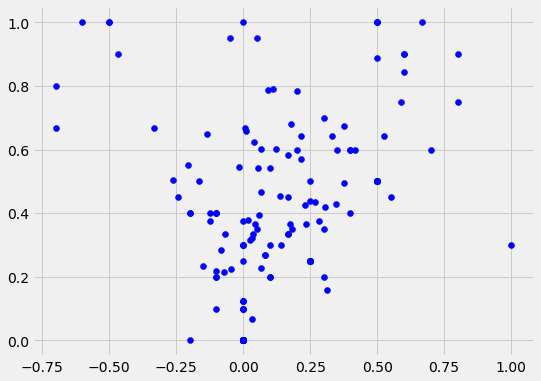

In [ ]:
plt.figure(figsize=(8,6))

for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectividad'][i], color='blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polaridad (Eje X)')
plt.ylabel('Subjetividad (Eje Y)')
plt.show()

EXPERIMENTO

In [ ]:
raw_data = {'name': ["Modi is a very bad candidate and steals from the people",
                     "Modi is a very good candidate and he really cares about the people"]}

In [ ]:
mensaje = "Modi is a very bad candidate and steals from the people"

In [ ]:
TextBlob(mensaje).sentiment.subjectivity

0.8666666666666667

In [ ]:
TextBlob(mensaje).sentiment.polarity

-0.9099999999999998

In [ ]:
mensaje2 = "Modi is a very good candidate and he really cares about the people"

In [ ]:
TextBlob(mensaje2).sentiment.subjectivity

0.4900000000000001

In [ ]:
TextBlob(mensaje2).sentiment.polarity

0.5549999999999999

Cantidad de tweets positivos:

In [ ]:
ptweet = df[df.category == 1.0]
pteet = ptweet['clean_tweet']

porcentaje = round(ptweet.shape[0] / df.shape[0] * 100, 1)

print("% de Tweets Positivos: ",porcentaje,"%")

% de Tweets Positivos:  43.2 %


Cantidad de tweets negativos:

In [ ]:
ptweet = df[df.category == -1.0]
pteet = ptweet['clean_tweet']

porcentaje = round(ptweet.shape[0] / df.shape[0] * 100, 1)

print("% de Tweets Negativos: ",porcentaje,"%")

% de Tweets Negativos:  12.8 %


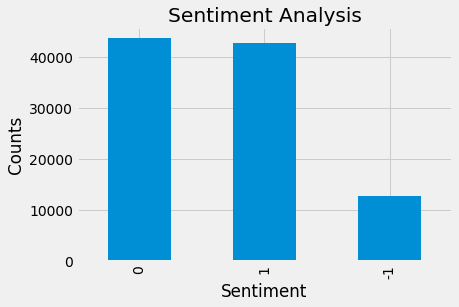

In [ ]:
df['category'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['category'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
# df.to_csv("tweet_mining.csv", index=False)